In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
%matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_query('select * from studentsperformance',con=engine)

In [3]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change

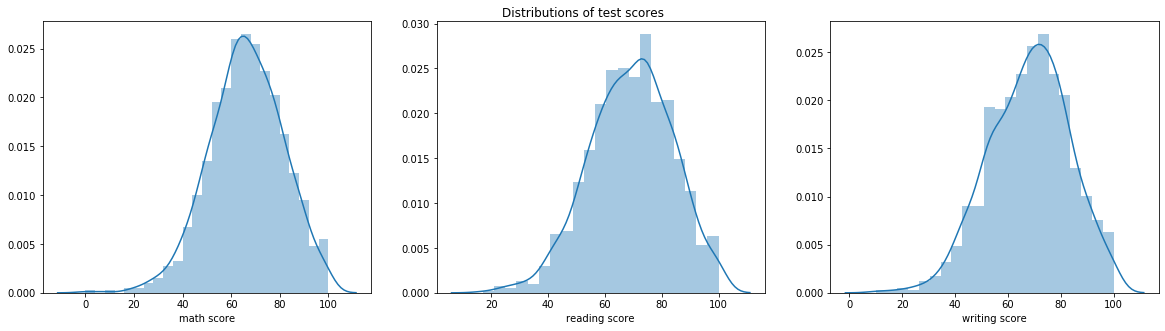

In [10]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

sns.distplot(students_df['math score'], ax=axes[0])

sns.distplot(students_df['reading score'], ax=axes[1])

sns.distplot(students_df['writing score'], ax=axes[2])

plt.suptitle('Distributions of test scores', y=0.92)
plt.show()

In [13]:
print('Math score normality')
print('Jarque bera test = ' + str(stats.jarque_bera(students_df['math score'])))
print('Normality test = ' + str(stats.normaltest(students_df['math score'])) + '\n')

print('Reading score normality')
print('Jarque bera test = ' + str(stats.jarque_bera(students_df['reading score'])))
print('Normality test = ' + str(stats.normaltest(students_df['reading score'])) + '\n')

print('Writing score normality')
print('Jarque bera test = ' + str(stats.jarque_bera(students_df['writing score'])))
print('Normality test = ' + str(stats.normaltest(students_df['writing score'])) + '\n')

Math score normality
Jarque bera test = (15.912256686712709, 0.0003505075386818213)
Normality test = NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

Reading score normality
Jarque bera test = (11.383300575987892, 0.0033740202672214448)
Normality test = NormaltestResult(statistic=11.11741279628622, pvalue=0.003853758403576582)

Writing score normality
Jarque bera test = (13.98509448257235, 0.0009187033894586527)
Normality test = NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)



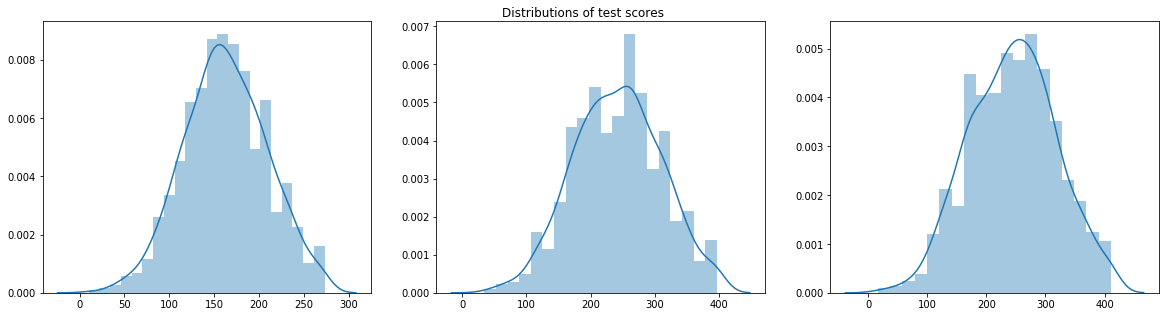

In [39]:
math_box = stats.boxcox(students_df.loc[students_df['math score']>0, 'math score'])[0] 
reading_box = stats.boxcox(students_df['reading score'])[0]
writing_box = stats.boxcox(students_df['writing score'])[0] 

fig, axes = plt.subplots(1,3,figsize=(20,5))

sns.distplot(math_box, ax=axes[0])

sns.distplot(reading_box, ax=axes[1])

sns.distplot(writing_box, ax=axes[2])

plt.suptitle('Distributions of test scores', y=0.92)
plt.show()

In [40]:
print('Math score normality')
print('Jarque bera test = ' + str(stats.jarque_bera(math_box)))
print('Normality test = ' + str(stats.normaltest(math_box)) + '\n')

print('Reading score normality')
print('Jarque bera test = ' + str(stats.jarque_bera(reading_box)))
print('Normality test = ' + str(stats.normaltest(reading_box)) + '\n')

print('Writing score normality')
print('Jarque bera test = ' + str(stats.jarque_bera(writing_box)))
print('Normality test = ' + str(stats.normaltest(writing_box)) + '\n')

Math score normality
Jarque bera test = (1.7200982636836308, 0.42314129209599327)
Normality test = NormaltestResult(statistic=1.8323075851586939, pvalue=0.4000547794685686)

Reading score normality
Jarque bera test = (4.119778573559666, 0.127468081515408)
Normality test = NormaltestResult(statistic=5.282274606965809, pvalue=0.07128015626992971)

Writing score normality
Jarque bera test = (4.746478090042761, 0.09317842784043195)
Normality test = NormaltestResult(statistic=6.267311355052559, pvalue=0.04355827085003712)



Following box-cox transofrmation, math score and reading score became more normally distributed (p > 0.05). Writing score approaches normality.

# 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [41]:
students_df['weighted_score'] = (students_df['math score']+students_df['reading score']+students_df['writing score'])/3

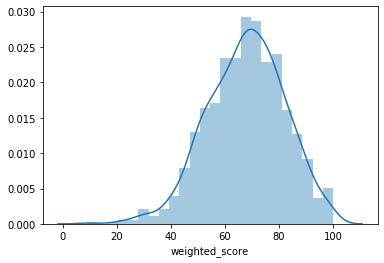

In [42]:
#Plot data for visualization and then test for normality

sns.distplot(students_df['weighted_score'])
plt.show()

In [43]:
print('Weighted score normality')
print('Jarque bera test = ' + str(stats.jarque_bera(students_df['weighted_score'])))
print('Normality test = ' + str(stats.normaltest(students_df['weighted_score'])))

Weighted score normality
Jarque bera test = (15.453387913085168, 0.00044089934264401887)
Normality test = NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)


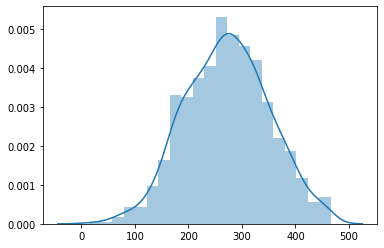

In [47]:
#Not normal, apply boxcox transformation, retest

weighted_score_box = stats.boxcox(students_df['weighted_score'])[0]

sns.distplot(weighted_score_box)
plt.show()

In [48]:
print('Weighted score normality')
print('Jarque bera test = ' + str(stats.jarque_bera(weighted_score_box)))
print('Normality test = ' + str(stats.normaltest(weighted_score_box)))

Weighted score normality
Jarque bera test = (2.4353989331279, 0.2959101356398447)
Normality test = NormaltestResult(statistic=2.779857602227616, pvalue=0.24909303914726724)


# 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

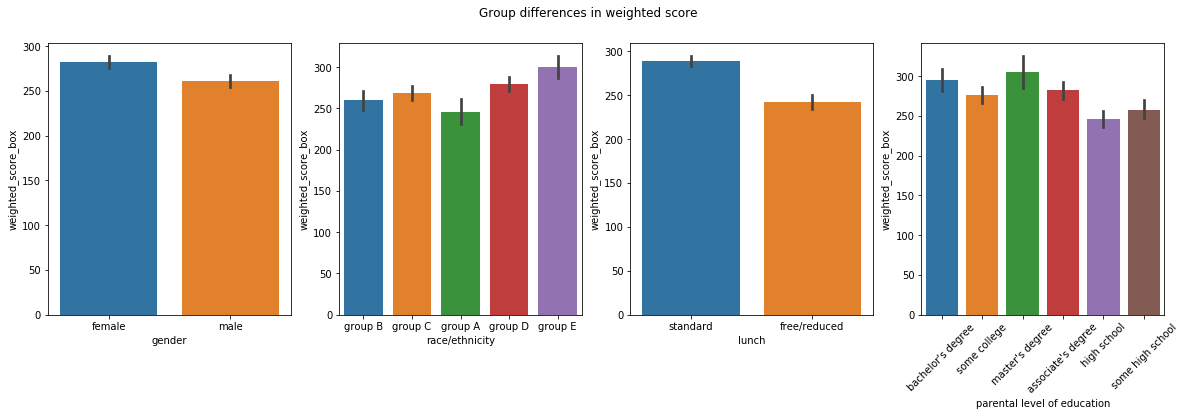

In [60]:
#Plot the weight_score variable across different groups to see if there are any relationships

students_df['weighted_score_box'] = weighted_score_box

fig, axes = plt.subplots(1,4, figsize=(20,5))

sns.barplot(x='gender', y='weighted_score_box', data=students_df, ax=axes[0])

sns.barplot(x='race/ethnicity', y='weighted_score_box', data=students_df, ax=axes[1])

sns.barplot(x='lunch', y='weighted_score_box', data=students_df, ax=axes[2])

sns.barplot(x='parental level of education', y='weighted_score_box', data=students_df, ax=axes[3])
for label in axes[3].get_xticklabels():
    label.set_rotation(45)

plt.suptitle('Group differences in weighted score')
plt.show()

The weighted_score variable varies across all the groups plotted above, therefore they should be included in the model to determine success in exams.